In [818]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Reduced Inertia tensor

$I_{i,j} = \sum_{x_n V} \dfrac{x_{n}^{(i)} x_{n}^{(j)}}{d_n^2}$

$d_n^2 = x_n^2 + y_n^2/q^2 + z_n^2/s^2$

$q =b/a$

$s = c/a$

$c\leq b \leq a$


# 1. Is the volume being conserved in this?
# 2. How to find the rotation matrix from the initial axys to the princial axys?

In [819]:
def A(V, x_cm, y_cm, z_cm):
    R = np.sqrt((V[0,:] - x_cm)**2 + (V[1,:] - y_cm)**2 + (V[2,:] - z_cm)**2)
    index = where(R == max(R))[0]
    return R[index]

- Function RIT computes the reduced inertia tensor which is a symmetric tensor.

In [820]:
def RIT(XYZ, q, s):
    I = np.zeros([3, 3])
    N = len(XYZ[0])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                d = np.sqrt(XYZ[0,n]**2.0 + XYZ[1,n]**2.0/q**2.0 + XYZ[2,n]**2.0/s**2.0)
                Xi = XYZ[i,n]
                Xj = XYZ[j,n]
                XX[n] = Xi * Xj / d**2.0
            I[i][j] = sum(XX)
    return I

In [821]:
# Make a matrix (3, 10) from coordinates x, y, z
def one_tensor(x, y, z):
    N = len(x)
    XYZ = zeros([3,N])
    XYZ[0,:] = x
    XYZ[1,:] = y
    XYZ[2,:] = z
    return XYZ

In [988]:
def sphere(n_points, radius):
    phi = random.rand(n_points) * 2 * pi
    theta = random.rand(n_points) * 2 - 1
    R = random.rand(n_points) * radius
    X = R**(1/3.0) * sin(phi) * sin(arccos(theta))
    Y = R**(1/3.0) * cos(phi) * sin(arccos(theta))
    Z = R**(1/3.0) * cos(arccos(theta))
    return X, Y, Z

def cube(n_points, theta):
    X = (random.rand(n_points) * 2.0 - 1.0)  
    Y = random.rand(n_points) * 2.0 - 1.0
    Z = (random.rand(n_points) * 20.0 - 10.0) 
    X =  X  
    Y =  cos(theta) * Y - sin(theta) * Z
    Z =  sin(theta) * Y + cos(theta) * Z
    return X, Y, Z

In [1117]:
def projection(x1, y1, x2, z2, y3, z3):
    figure(figsize=(17, 5))
    subplot(1, 3, 1)
    scatter(x1, y1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$y$', fontsize=25)
    
    subplot(1, 3, 2)
    scatter(x2, z2, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    subplot(1, 3, 3)
    scatter(y3, z3, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$y$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    
def projection2(x1, y1, x2, z2, y3, z3, X1, Y1, Z1):
    figure(figsize=(17, 5))
    subplot(1, 3, 1)
    plot(x1, y1, lw=2)
    scatter(X1, Y1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$y$', fontsize=25)
    
    subplot(1, 3, 2)
    plot(x2, z2, lw=2)
    scatter(X1, Z1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    subplot(1, 3, 3)
    plot(y3, z3, lw=2)
    scatter(Y1, Z1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$y$', fontsize=25)
    ylabel('$z$', fontsize=25)

The eigenvalues of the intertia tensor are related with the lenght of the
major axis as:
    
$a, b, c = \sqrt{\lambda_a, \lambda_b, \lambda_c}$

where:
    
$\lambda_a \leq \lambda_b \leq \lambda_c$
    


In [947]:
def Shape(XYZ, tol):
    old_q = 1.2
    old_s = 1.2
    new_q = 1.0
    new_s = 1.0 
    
    #evec_f = np.ones([3, 3])
    while((abs(new_s - old_s) > tol) & (abs(new_q - old_q) > tol)):
        old_s = new_s
        old_q = new_q
        I_test = RIT(XYZ, old_q, old_s)
        eival, evec = eig(I_test)
        oeival = sort(eival)
        XYZ = dot(evec.T, XYZ)
        #print oeival
        la = oeival[2]
        lb = oeival[1]
        lc = oeival[0]
        #evec_f = np.dot(evec.T, evec_f)
        new_q = np.sqrt(lb/la)
        new_s = np.sqrt(lc/la)
    return new_s, new_q, XYZ, evec

In [1091]:
x, y, z = cube(500, pi/4.0)

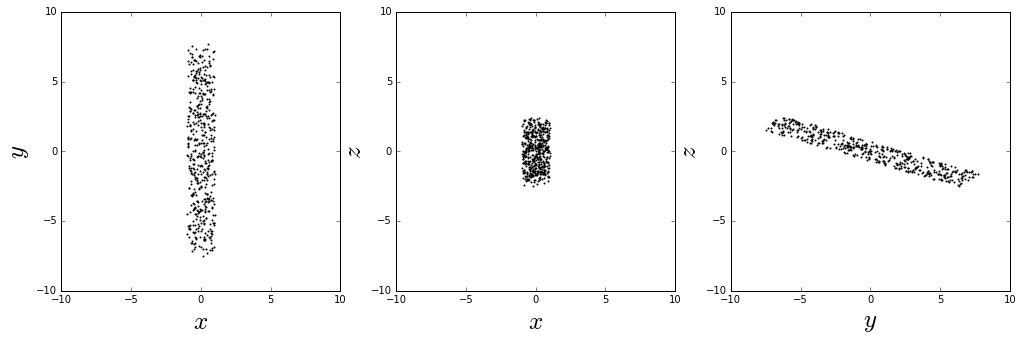

In [1092]:
projection(x, y, x, z, y, z)

- The eigenvalues represents the axis ratios of the new set of principal axis. These values are related with $s$ and $q$
- The eigenvectors gives the rotation matrix to allign the halo with the principal axis.

In [1127]:
cube_xyz = one_tensor(x, y, z)
s, q, R, b_evec = Shape(cube_xyz, 1E-6)
print s, q, b_evec

0.093055975195 0.127052402296 [[  1.00000000e+00  -1.72474195e-06   8.69311709e-07]
 [ -1.72481647e-06  -9.99999996e-01   8.57383509e-05]
 [ -8.69163829e-07   8.57383524e-05   9.99999996e-01]]


## Projections after finding the principal axis, $s$ and $q$

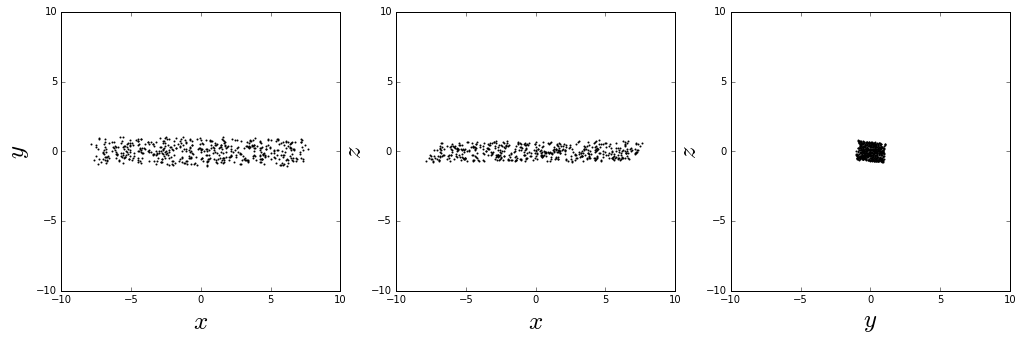

In [1102]:
projection(R[0,:], R[1,:], R[0,:], R[2,:], R[1,:], R[2,:])

In [1120]:
def Ellipsoid(a, b, c):
    theta = linspace(-pi, pi)
    phi = linspace(0, 2*np.pi)
    x1 = a * cos(theta) #* cos(phi)
    y1 = b * sin(theta) #* sin(phi)
    x2 = a * cos(phi) #* cos(phi)
    z2 = c * sin(phi) #* sin(phi)
    y3 = b * cos(theta) #* cos(phi)
    z3 = c * sin(theta) #* sin(phi)
    return x1, y1, x2, z2, y3, z3

In [1121]:
a = A(cube_xyz,0,0,0)
print a, q, s

[ 7.89210101] 0.127052402296 0.093055975195


In [1124]:
x1, y1, x2, z2, y3, z3 = Ellipsoid(a, q*a, s*a)

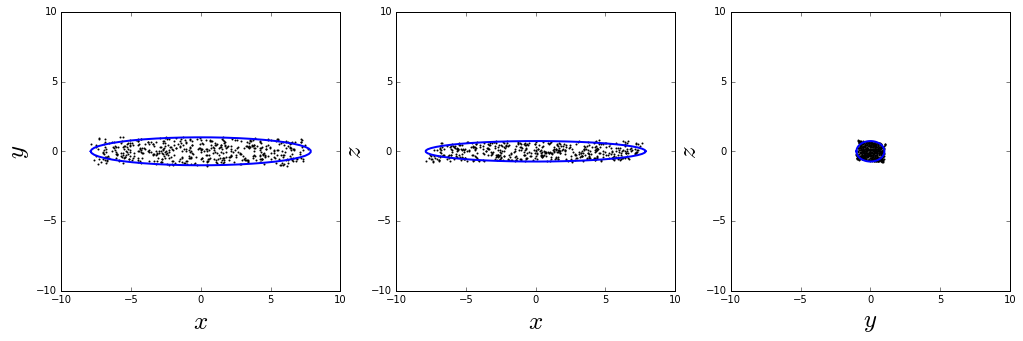

In [1126]:
projection2(x1, y1, x2, z2, y3, z3, R[0,:], R[1,:], R[2,:])

In [1128]:

cube_xyz = one_tensor(x1, y1, 0)
I_test = RIT(cube_xyz, 1, 1)
eival, evec = eig(I_test)
print evec
print eival

[[ 0.00722481 -0.99638764  0.08461371]
 [-0.95734799  0.01754967  0.28840396]
 [ 0.28884708  0.08308843  0.9537629 ]]
[ 435.16261854   41.61089242   23.22648904]


In [1129]:
XYZ_e_rot = dot(evec, cube_xyz)

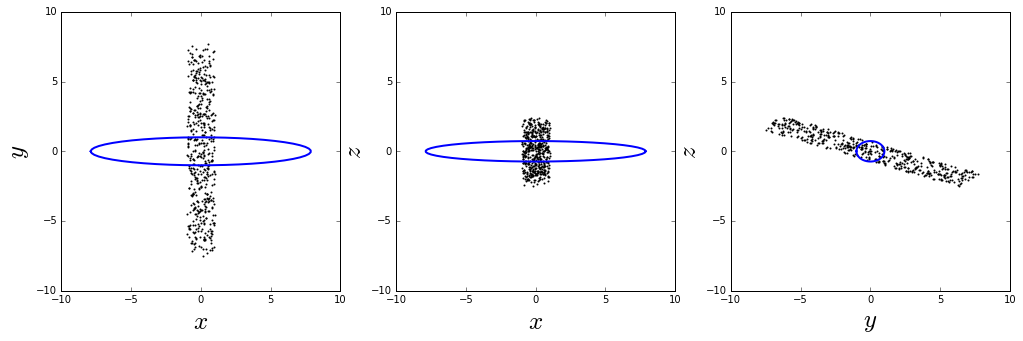

In [1130]:
projection2(x1, y1, x2, z2, y3, z3, x, y, z)

(-10, 10)

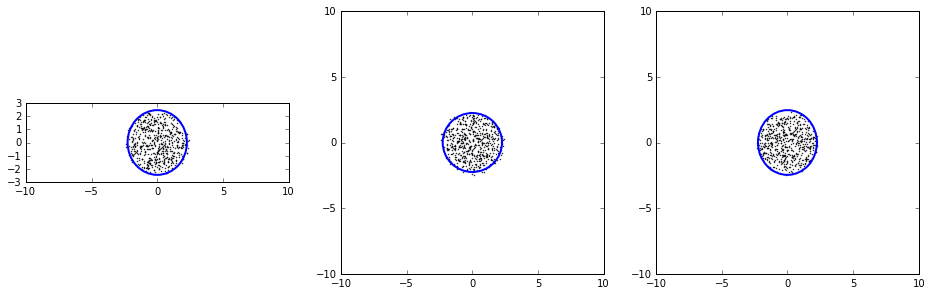

In [1013]:
fig = pylab.figure(figsize=(16, 6))
ax = pylab.subplot(1, 3, 1, aspect='equal')
e = (Ellipse(xy=(0,0), width=2*q*a, height=2*a, angle=0))
ax.add_artist(e)
e.set_edgecolor('b')
e.set_clip_box(ax.bbox)
e.set_fill(False)
e.set_lw(2)
scatter(x, y, s=0.2)
e.set_alpha(1)
xlim(-10, 10)

ax = pylab.subplot(1, 3, 2, aspect='equal')
e = (Ellipse(xy=(0,0), width=2*q*a, height=2*s*a, angle=0))
ax.add_artist(e)
e.set_edgecolor('b')
e.set_clip_box(ax.bbox)
e.set_fill(False)
e.set_lw(2)
scatter(x, z, s=0.2)
e.set_alpha(1)
xlim(-10, 10)
ylim(-10, 10)

ax = pylab.subplot(1, 3, 3, aspect='equal')
e = (Ellipse(xy=(0,0), width=2*s*a, height=2*a, angle=0))
ax.add_artist(e)
e.set_edgecolor('b')
e.set_clip_box(ax.bbox)
e.set_fill(False)
e.set_lw(2)
scatter(y, z, s=0.2)
e.set_alpha(1)
xlim(-10, 10)
ylim(-10, 10)